# Practice 1: Data Science Salaries
In this practice assignment I looked at the Salary dataset provided by randomarnab on [kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) and predicted the salary without using salary information (salary, salary in USD, salary currency). 

The following questions will be anwsered in this document:
* How to deal with data cleaning on this dataset?
* How to deal with Job titles?
* How to deal with multiple countries?
* How to best apply hyper parameters on this dataset using a decision tree?
* What is grid search with cross-validation?
* What is feature importance in a decision tree?
* What is a random forest regressor?

## Made By Jarno Weemen

In [27]:
# Neccessary
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
df_salaries = pd.read_csv("Data/ds_salaries.csv")
df_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


### Cleaning the dataset
Now that the dataset has been imported, the dataset can be cleaned. To do this I first start to look at any missing and inconsistend values to get a more structured dataset. I also looked at the column names, which already look like they follow a convention for naming.

In [3]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


As you can see there are no missing values in any column, which is a good thing and saves time. The only thing this way overlooks is values that are set to zero, which could mean a number of things depending on the column.

In [4]:
for col in df_salaries.columns:
    print("Col:{} ,unique values:{}".format(col, df_salaries[col].unique()))

Col:work_year ,unique values:[2023 2022 2020 2021]
Col:experience_level ,unique values:['SE' 'MI' 'EN' 'EX']
Col:employment_type ,unique values:['FT' 'CT' 'FL' 'PT']
Col:job_title ,unique values:['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 '

The only column that stands out here that has values that are similair is the job_title column. Besides that column remote_ratio has values equal to zero, but that can be explained, because it's the percentage of working remote.

The next step is to deal with the job titles and luckily a kaggle coder already has a function provided for dealing with this problem. The way the function works, is by defining a bunch of arrays that contain the job titles that correspond with the array variable name. After that a big if else statement is used to check if the job title that is given is in a certain array and if true, it returns the grouped job title name.

In [5]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 
                             'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 
                             'Staff Data Scientist',  'Principal Data Analyst', 'Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 
                               'Machine Learning Researcher', 'Machine Learning Scientist', 
                               'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 
                               'Principal Machine Learning Engineer', 'Machine Learning Developer', 
                               'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 
                           'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 
                           'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 
                            'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 
                            'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 
                           'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 
                           'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']
    
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [6]:
# Looping over each unique job value and replacing all values with that name, with the output of segment_job_title.
for job in df_salaries['job_title'].unique():
    df_salaries['job_title'].replace(to_replace=job, value=segment_job_title(job), inplace=True)

print(df_salaries['job_title'].unique())

['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence and Analytics'
 'Other']


In [7]:
def segment_country(country):
    europe = ['ES', 'DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SI', 'HR', 'GR', 'MK', 'LV', 'RO', 
              'IT', 'LT', 'BE', 'HU', 'SK', 'CZ', 'JE', 'BG', 'RS', 'MD', 'LU', 'MT', 'SE', 'PL', 'CY', 'EE', 'RU', 'DK', 'AL']
    north_america = ['US', 'CA', 'MX', 'CR', 'PR', 'DO', 'BM', 'HN', 'BS']
    africa = ['NG', 'GH', 'KE', 'TN', 'DZ', 'MA', 'EG']
    asia = ['IN', 'HK', 'SG', 'UZ', 'TH', 'CN', 'AE', 'MY', 'JP', 'IQ', 'PK', 'IR', 'IL', 'KW', 'VN', 'AM', 'BA', 'TR', 
            'ID', 'PH']
    south_america = ['CO', 'BR', 'AR', 'BO', 'CL']
    oceania = ['AU', 'NZ', 'AS']
    
    if country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in africa:
        return 'Africa'
    elif country in asia:
        return 'Asia'
    elif country in south_america:
        return 'South America'
    elif country in oceania:
        return 'Oceania'
    else:
        return country

In [8]:
# Looping over each unique country value and replacing all values with that name, with the output of segment_country.
for country in df_salaries['employee_residence'].unique():
    df_salaries['employee_residence'].replace(to_replace=country, value=segment_country(country), inplace=True)

print(df_salaries['employee_residence'].unique())

['Europe' 'North America' 'Africa' 'Asia' 'Oceania' 'South America']


In [9]:
# Looping over each unique country value and replacing all values with that name, with the output of segment_country.
for country in df_salaries['company_location'].unique():
    df_salaries['company_location'].replace(to_replace=country, value=segment_country(country), inplace=True)

print(df_salaries['company_location'].unique())

['Europe' 'North America' 'Africa' 'Asia' 'South America' 'Oceania']


We'll also look at the other codes that aren't that descriptive and replace those values.

In [10]:
df_salaries['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
}, inplace=True)

df_salaries['experience_level'].unique()

array(['Senior', 'Mid/Intermediate level', 'Entry level',
       'Executive level'], dtype=object)

In [11]:
df_salaries['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
}, inplace=True)

df_salaries['employment_type'].unique()

array(['Full-time', 'Contractor', 'Freelancer', 'Part-time'], dtype=object)

In [12]:
df_salaries['remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100 : 'Full-Remote',
}, inplace=True)

df_salaries['remote_ratio'].unique()

array(['Full-Remote', 'On-Site', 'Half-Remote'], dtype=object)

Now that this is fixed, the cleaning part of this dataset is done and the next part will be analysing the data by looking at features we can best use to predict the salary.

### Analysing the dataset
We want to predict the salary of a person based on columns other than salary like features (salary and salary currency), so lets look at which columns would be valuable for that. 

In [13]:
pd.set_option('display.float_format', '{:.0f}'.format) # Format to show numbers fully without decimal points.
df_salaries["salary_in_usd"].describe() # Look at salary in USD to have a generalized currency.

count     3755
mean    137570
std      63056
min       5132
25%      95000
50%     135000
75%     175000
max     450000
Name: salary_in_usd, dtype: float64

The first thing to plot is salary per job and their employment type.

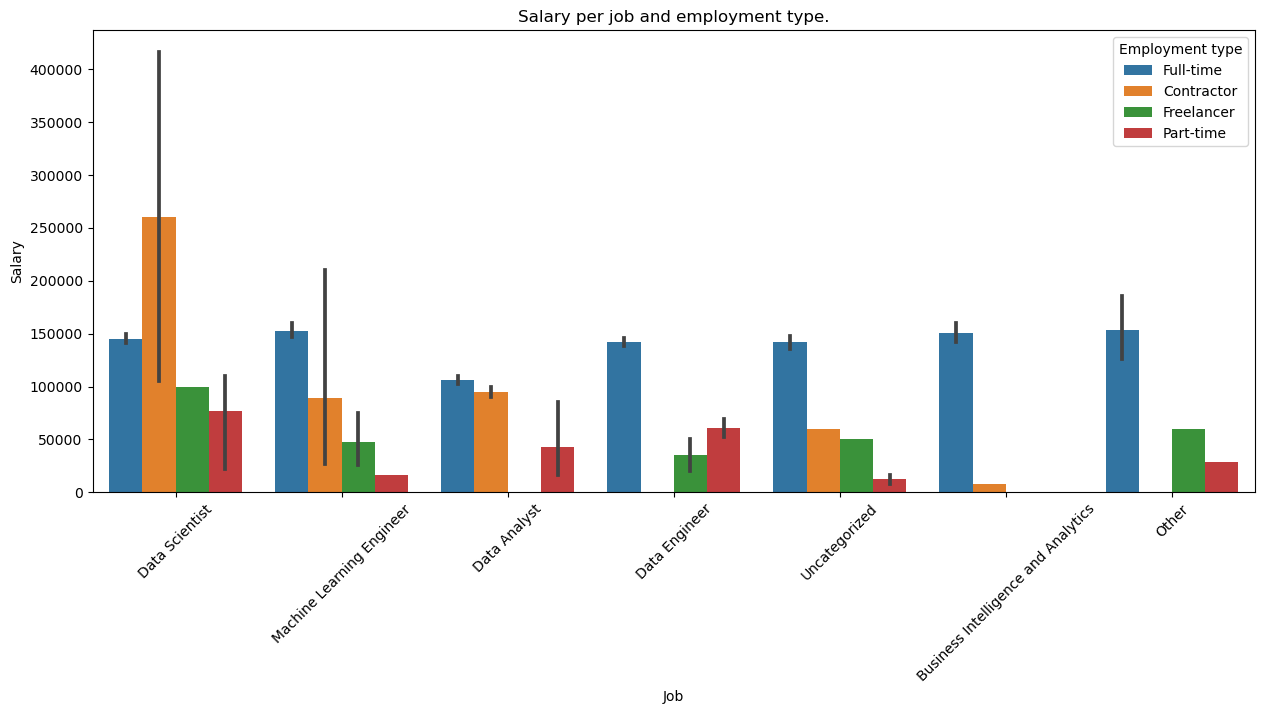

In [14]:
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
sns.barplot(data=df_salaries, x="job_title", y="salary_in_usd", hue="employment_type")
plt.title("Salary per job and employment type.")
plt.legend(title="Employment type")
plt.xlabel("Job")
plt.ylabel("Salary")
plt.show()

As you can see a data scientist overall earns more, no matter the employment type, but full-time workers no matter the job earn the most except for a data scientist where a contractor earns more. Between freelancer and part-time work, a freelancer overall earns more.

The next plot shows the salary per job and experience level.

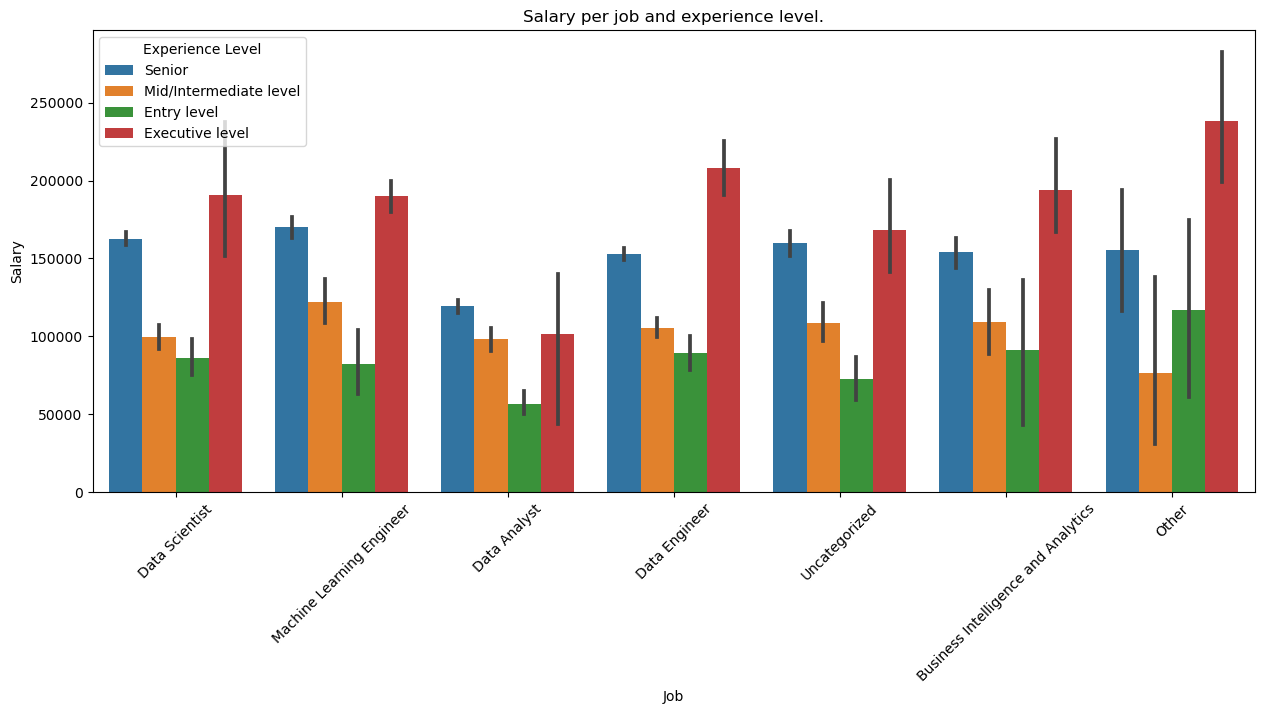

In [15]:
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
sns.barplot(data=df_salaries, x="job_title", y="salary_in_usd", hue="experience_level")
plt.title("Salary per job and experience level.")
plt.legend(title="Experience Level")
plt.xlabel("Job")
plt.ylabel("Salary")
plt.show()

The plot above shows what I already expected, which is that the higher your experience level, the more you get payed.

Next up is a plot that shows the salary per company location and their size.

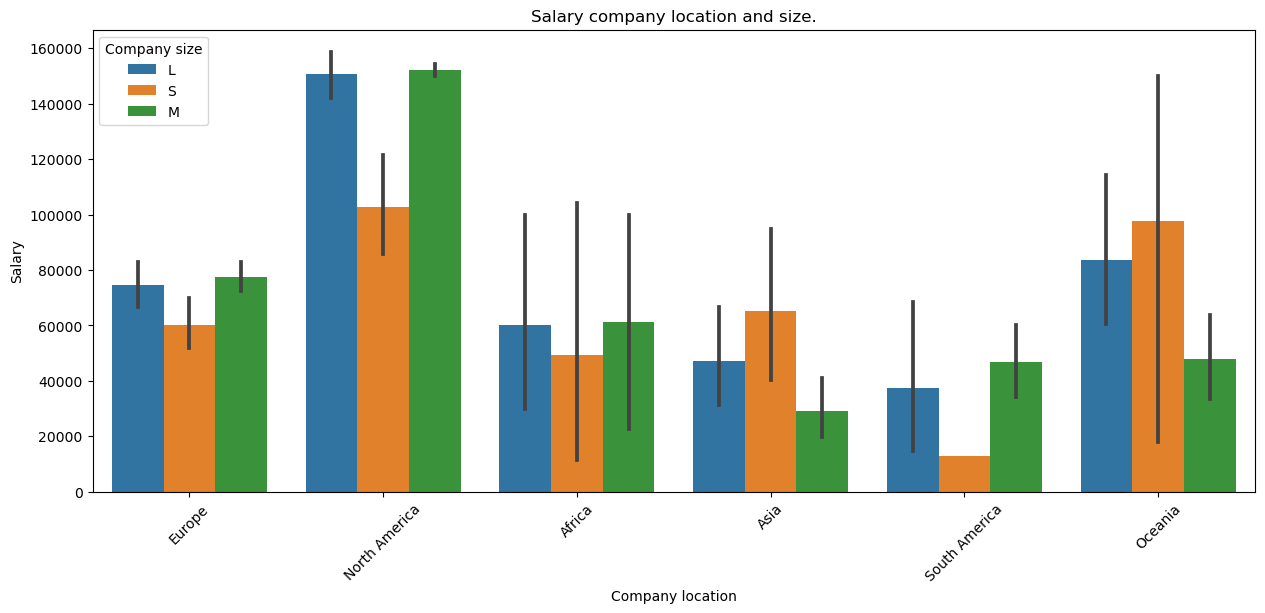

In [16]:
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
sns.barplot(data=df_salaries, x="company_location", y="salary_in_usd", hue="company_size")
plt.title("Salary company location and size.")
plt.legend(title="Company size")
plt.xlabel("Company location")
plt.ylabel("Salary")
plt.show()

As you can see it shows that overall medium and large companies pay the most, except for Asia and Oceania, where the smalle companies pay more. This to me is quite weird, but might have to do with bigger companies, paying less because there is always a replacement or some regulations in the countries of that continent.

Another thing to notice is that europe doesn't pay that much compared to North America, even tho countries in that continent are overall more advanced and not third world countries.

Lastly I'll look at salary per year and the remote work ratio.

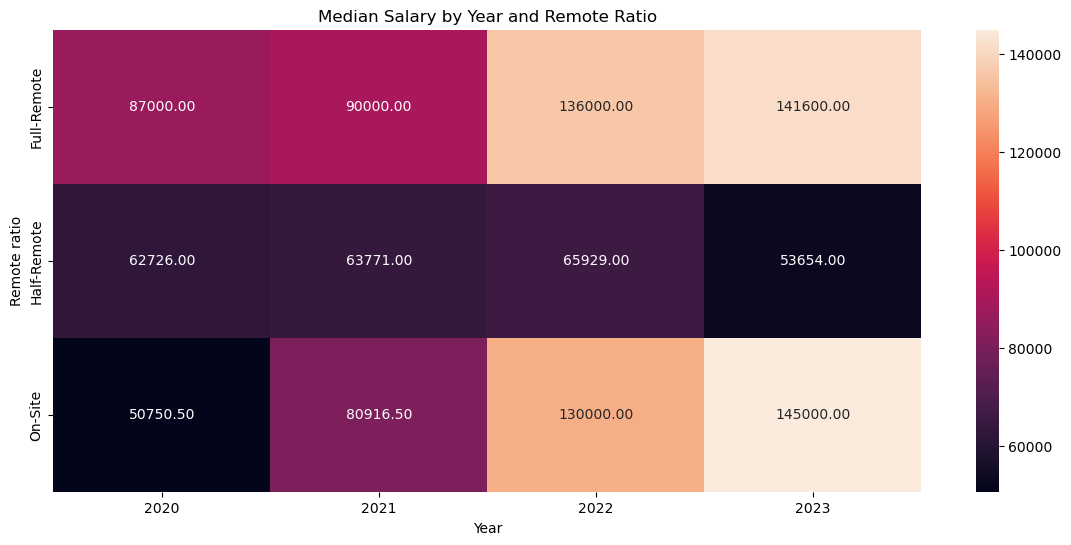

In [17]:
df = df_salaries.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='salary_in_usd', index='remote_ratio', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Median Salary by Year and Remote Ratio')
plt.xlabel('Year')
plt.ylabel('Remote ratio')
plt.show()

As you can see the full-time work overall is high and stays high, the half-remote is on the lower and, and stays low, and the on-site salary starts low, but increases over the year.

Now that we've looked at the data, it looks like most things matter when predicting the salary, the only problem so far is that year is a bit inconsistend and now shows trends of higher and lower payment even tho that can changes drastically by the year. Remote ratio also might not be good, because Covid happened and probably changed to much because those were kind of anomaly years when you compare them to the previous 10 - 20 years of how people worked. This however is still just an assumption and will become clear in the next part where the model will be created and tested to predict the salary in USD.

### Modeling the dataset
Lastly we will predict salary in USD after training the model by tuning it for the best hyper-parameters and I'll look into grid search with cross-validation.

In [63]:
df_temporary = df_salaries.copy()
X = df_temporary.loc[:, ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']]
y = df_salaries['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

el_lb = LabelBinarizer() # Experience Level
et_lb = LabelBinarizer() # Employment Type
jt_lb = LabelBinarizer() # Job Title
er_lb = LabelBinarizer() # Employee Residence
cl_lb = LabelBinarizer() # Company Location
cs_lb = LabelBinarizer() # Company Size

el_enc = pd.DataFrame(el_lb.fit_transform(X_train['experience_level']), columns=el_lb.classes_)
et_enc = pd.DataFrame(et_lb.fit_transform(X_train['employment_type']), columns=et_lb.classes_)
jt_enc = pd.DataFrame(jt_lb.fit_transform(X_train['job_title']), columns=jt_lb.classes_)
er_enc = pd.DataFrame(er_lb.fit_transform(X_train['employee_residence']), columns=er_lb.classes_)
cl_enc = pd.DataFrame(cl_lb.fit_transform(X_train['company_location']), columns=cl_lb.classes_)
cs_enc = pd.DataFrame(cs_lb.fit_transform(X_train['company_size']), columns=cs_lb.classes_)

X_train_encoded = pd.concat((el_enc, et_enc, jt_enc, er_enc, cl_enc, cs_enc), axis=1)

el_lb_test = LabelBinarizer() # Experience Level
et_lb_test = LabelBinarizer() # Employment Type
jt_lb_test = LabelBinarizer() # Job Title
er_lb_test = LabelBinarizer() # Employee Residence
cl_lb_test = LabelBinarizer() # Company Location
cs_lb_test = LabelBinarizer() # Company Size

el_enc_test = pd.DataFrame(el_lb_test.fit_transform(X_test['experience_level']), columns=el_lb_test.classes_)
et_enc_test = pd.DataFrame(et_lb_test.fit_transform(X_test['employment_type']), columns=et_lb_test.classes_)
jt_enc_test = pd.DataFrame(jt_lb_test.fit_transform(X_test['job_title']), columns=jt_lb_test.classes_)
er_enc_test = pd.DataFrame(er_lb_test.fit_transform(X_test['employee_residence']), columns=er_lb_test.classes_)
cl_enc_test = pd.DataFrame(cl_lb_test.fit_transform(X_test['company_location']), columns=cl_lb_test.classes_)
cs_enc_test = pd.DataFrame(cs_lb_test.fit_transform(X_test['company_size']), columns=cs_lb_test.classes_)

X_test_encoded = pd.concat((el_enc_test, et_enc_test, jt_enc_test, er_enc_test, cl_enc_test, cs_enc_test), axis=1)

param_grid = {'max_depth': [1, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

In [67]:
# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Fit the classifier with the feature matrix and target variable
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=KFold(5))
grid_search.fit(X_train_encoded, y_train)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_encoded, y_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.03462232076866223
Test Accuracy: 0.03794940079893475


In [50]:
# Access the feature importances
importances = best_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

Entry level: 0.0
Executive level: 0.0
Mid/Intermediate level: 0.0
Senior: 0.0
Contractor: 0.0
Freelancer: 0.0
Full-time: 0.0
Part-time: 0.0
Business Intelligence and Analytics: 0.0
Data Analyst: 1.0
Data Engineer: 0.0
Data Scientist: 0.0
Machine Learning Engineer: 0.0
Other: 0.0
Uncategorized: 0.0
